# Titanic Kaggle ML Competition

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

#Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#### Loading datasets as pandas dataframe

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Descriptive Statistics

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Functions
Function **draw_missing_data_table** will create a dataframe of missing values in each column.<br>
Function **plot_learning_curve** will help in plotting learning curves for various machine learning models.

In [9]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

print(draw_missing_data_table(df_train))

             Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000


Function **plot_validation_curve** will help in visualizing validation curve of various machine learing models.

In [10]:
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

### Exploratory Data Analysis of Dataset

In [11]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
#Concatenating train and test dataset
df = pd.concat([df_train.drop(['Survived'], axis=1), df_test])
df.head(n=2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


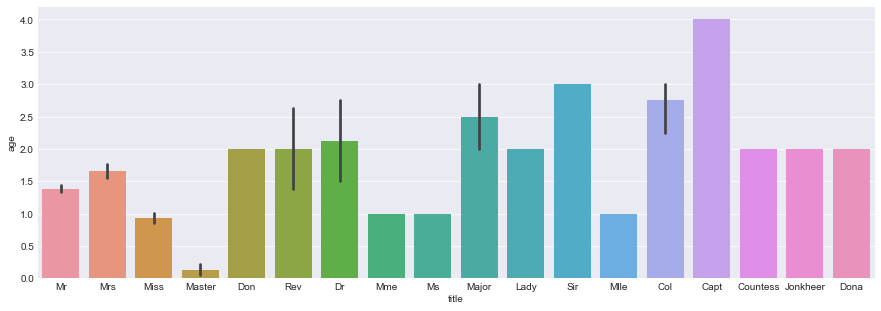

In [49]:
# Plot bar plot of title and age
plt.figure(figsize=(15,5))
sns.barplot(x=df['title'], y=df['age']);

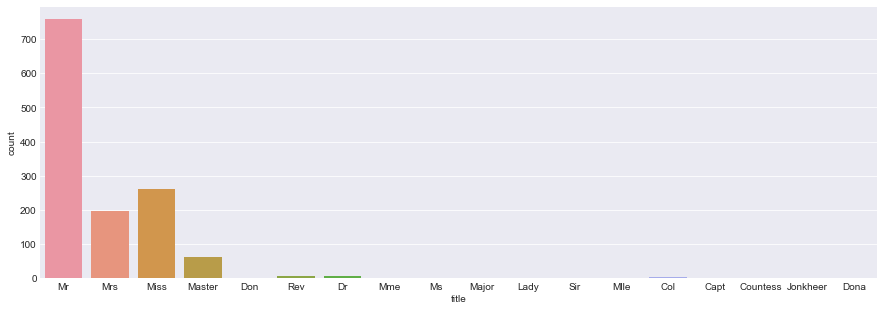

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(df['title']);

In [13]:
draw_missing_data_table(df)

,Total,Percent
Cabin,1014,0.774637
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [14]:
df.shape

(1309, 11)

In [15]:
df.columns = df.columns.str.lower()
df.head(2)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
passengerid    1309 non-null int64
pclass         1309 non-null int64
name           1309 non-null object
sex            1309 non-null object
age            1046 non-null float64
sibsp          1309 non-null int64
parch          1309 non-null int64
ticket         1309 non-null object
fare           1308 non-null float64
cabin          295 non-null object
embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [17]:
df['family_size'] = df['sibsp'] + df['parch']
df.head(2)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_size
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [18]:
for i in df:
    df['title'] = df['name'].str.extract('([A-Za-z]+)\.', expand = False)

df.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_size,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [19]:
df['title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Don           1
Dona          1
Lady          1
Countess      1
Jonkheer      1
Capt          1
Mme           1
Sir           1
Name: title, dtype: int64

### Filling in Missing values
#### Getting rows with missing values

In [20]:
df.reset_index(drop = True, inplace = True)
df[df['fare'].isnull()]

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_size,title
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,Mr


#### Displaying few rows before and after of missing value
To see if there is a pattern

In [21]:
df.iloc[1040:1045,:]

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_size,title
1040,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,NaN,S,2,Rev
1041,1042,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C54,C,1,Mrs
1042,1043,3,"Matinoff, Mr. Nicola",male,NaN,0,0,349255,7.8958,NaN,C,0,Mr
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,Mr
1044,1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0,2,350405,12.1833,NaN,S,2,Mrs


In [24]:
df[df['embarked'].isnull()]

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_size,title
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,Miss
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,Mrs


In [25]:
# Means per title
df['title'] = df['title']  # To simplify data handling
means = df.groupby('title')['age'].mean()
means.head()

title
Capt        70.0
Col         54.0
Countess    33.0
Don         40.0
Dona        39.0
Name: age, dtype: float64

In [26]:
# Transform means into a dictionary for future mapping
map_means = means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 54.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dona': 39.0,
 'Dr': 43.571428571428569,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 5.4826415094339627,
 'Miss': 21.774238095238097,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.252151462994838,
 'Mrs': 36.994117647058822,
 'Ms': 28.0,
 'Rev': 41.25,
 'Sir': 49.0}

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
passengerid    1309 non-null int64
pclass         1309 non-null int64
name           1309 non-null object
sex            1309 non-null object
age            1046 non-null float64
sibsp          1309 non-null int64
parch          1309 non-null int64
ticket         1309 non-null object
fare           1308 non-null float64
cabin          295 non-null object
embarked       1307 non-null object
family_size    1309 non-null int64
title          1309 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 133.0+ KB


In [28]:
# Means per title in dataset
df['title'] = df['title']  # To simplify data handling
means = df.groupby('title')['age'].mean()
means

title
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: age, dtype: float64

In [29]:
df['age'].fillna(df['age'].median(), inplace=True)

df['embarked'] = df['embarked'].fillna('S')
df['fare'] = df['fare'].fillna(df['fare'].median())
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
passengerid    1309 non-null int64
pclass         1309 non-null int64
name           1309 non-null object
sex            1309 non-null object
age            1309 non-null float64
sibsp          1309 non-null int64
parch          1309 non-null int64
ticket         1309 non-null object
fare           1309 non-null float64
cabin          295 non-null object
embarked       1309 non-null object
family_size    1309 non-null int64
title          1309 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 133.0+ KB


#### Feature Engineering

In [31]:
df.loc[df['fare'] <= 7.91, 'fare'] = 0
df.loc[(df['fare'] > 7.91) & (df['fare'] <= 14.454), 'fare'] = 1
df.loc[(df['fare'] > 14.454) & (df['fare'] <= 31), 'fare']   = 2
df.loc[df['fare'] > 31, 'fare'] = 3

df.loc[df['age'] <= 16, 'age'] = 0
df.loc[(df['age'] > 16) & (df['age'] <= 32), 'age'] = 1
df.loc[(df['age'] > 32) & (df['age'] <= 48), 'age'] = 2
df.loc[(df['age'] > 48) & (df['age'] <= 64), 'age'] = 3
df.loc[df['age'] > 64, 'age'] = 4

In [33]:
df.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_size,title
0,1,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3.0,C85,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1.0,NaN,S,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3.0,C123,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1.0,NaN,S,0,Mr


#### Feature Transformation

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

X_train = df[['pclass', 'sex', 'age', 'fare', 'embarked', 'family_size']]
X_train = pd.get_dummies(X_train, drop_first = True)

#Subsetting
X_test = X_train.iloc[891:]
X_train = X_train.iloc[:891]
# X_train_1 = X_train.iloc[:891]
# X_train_2 = X_train.iloc[:891]

y_train = df_train['Survived']

# standard_scale = StandardScaler()
# minmax_scale = MinMaxScaler()

# X_test_ss = standard_scale.fit_transform(X_test)

# X_train_ss = standard_scale.fit_transform(X_train_1)
# X_train_mm = minmax_scale.fit_transform(X_train_2)

#### Building Machine Learing Models
I am building 5 different models and will compare their performance.
1. Logistic Regression
2. Decision Trees
3. Support Vector
4. Random Forest
5. XG Boost

In [35]:
from sklearn.model_selection import GridSearchCV

logi = LogisticRegression()
tree_class = DecisionTreeClassifier(max_depth=3)
svc_class = SVC()
param_svc = {'C':[0.1,1,10,100,1000,],'gamma':[10,1,0.1,0.01,0.001,0.0001]}
rf_class = RandomForestClassifier(n_estimators=100, max_depth=3)
xg_cl = xgb.XGBClassifier(objective='binary:logistic', reg_alpha=0.01, reg_lambda=1)
param_xg = {'gamma':[10, 11], 'learning_rate':[0.01,1, 1.01, 1.04, 1.1],'max_depth':[3,4,5,6], 'n_estimators':[150,200]}

In [36]:
grid_svc = GridSearchCV(svc_class, param_svc)
grid_xg = GridSearchCV(xg_cl, param_xg)

In [37]:
logi_model = np.mean(cross_val_score(logi, X_train, y_train, cv=10))
tree_model = np.mean(cross_val_score(tree_class, X_train, y_train, cv=10))
svc_model = np.mean(cross_val_score(grid_svc, X_train, y_train, cv=10))
rf_model = np.mean(cross_val_score(rf_class, X_train, y_train, cv=10))
xg_model = np.mean(cross_val_score(grid_xg, X_train, y_train, cv=10))

# Best classifier
index = np.argmax([logi_model, tree_model, svc_model, rf_model, xg_model])
classifiers = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector', 3: 'Random Forest', 4: 'Xg Boost'}
print('Best Survivor classifier is {}'.format(classifiers[index]))

Best Survivor classifier is Support Vector


In [42]:
grid_svc.fit(X_train, y_train)
grid_xg.fit(X_train, y_train)
print(grid_svc.best_params_)
grid_xg.best_params_

{'C': 1, 'gamma': 0.1}


{'gamma': 11, 'learning_rate': 1.01, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
# Select features using chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Cross Validation scores of each model

In [51]:
print('CV Score of Logistic Regression = ', logi_model)
print('CV Score of Decision Trees = ', tree_model)
print('CV Score of Support Vector = ', svc_model)
print('CV Score of Random Forest = ', rf_model)
print('CV Score of XG Boost = ', xg_model)

CV Score of Logistic Regression =  0.782266485075
CV Score of Decision Trees =  0.812554477358
CV Score of Support Vector =  0.822718193168
CV Score of Random Forest =  0.810407445239
CV Score of XG Boost =  0.813665588469


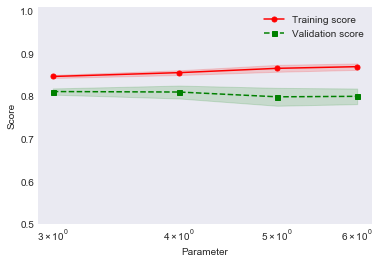

In [48]:
# Validation Curves
title = 'Validation Curve Logistic Regression'
param_name = 'max_depth'
param_maxdepth = [3,4,5,6]
cv = 10
plot_validation_curve(estimator=xg_cl, title=title, X=X_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_maxdepth);

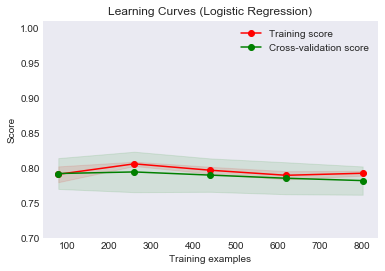

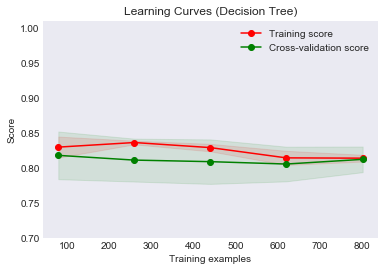

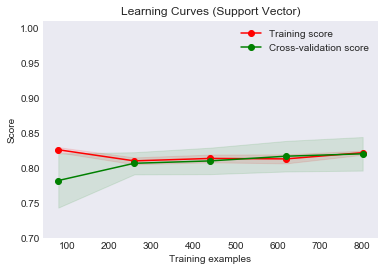

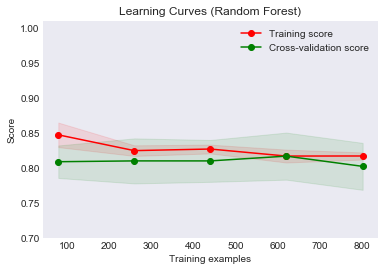

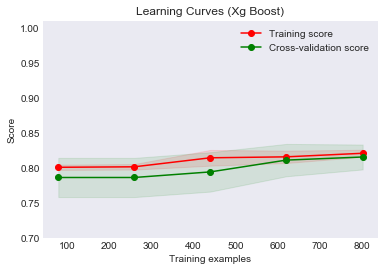

In [43]:
# learning Curves
title_logi = "Learning Curves (Logistic Regression)"
title_tree = "Learning Curves (Decision Tree)"
title_svc = "Learning Curves (Support Vector)"
title_rf = "Learning Curves (Random Forest)"
title_xg = "Learning Curves (Xg Boost)"


plot_learning_curve(logi, title_logi, X_train, y_train, ylim=(0.7, 1.01), cv=10, n_jobs=1);
plot_learning_curve(tree_class, title_tree, X_train, y_train, ylim=(0.7, 1.01), cv=10, n_jobs=1);
plot_learning_curve(grid_svc.best_estimator_, title_svc, X_train, y_train, ylim=(0.7, 1.01), cv=10, n_jobs=1);
plot_learning_curve(rf_class, title_rf, X_train, y_train, ylim=(0.7, 1.01), cv=10, n_jobs=1);
plot_learning_curve(grid_xg.best_estimator_, title_xg, X_train, y_train, ylim=(0.7, 1.01), cv=10, n_jobs=1);

#### Getting Predictions

In [44]:
pred_svc = grid_svc.predict(X_test)
df_test['Survived'] = pred_svc

In [72]:
df_test[['PassengerId', 'Survived']].to_csv('titanic_svc.csv', index=False)